In [15]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from importlib import reload
import xarray as xr
from xarray import Dataset as ds
import sys
sys.path.append('..')
sys.path.append('/ocean/tjarniko/MEOPAR/at3/notebooks/CLUSTER/verze2pt0/hind_clfxn/')
import map_fxn as mf
%matplotlib inline
bath = '/data/tjarniko/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:])
import colorsys
import scipy.io as sio
import cmocean 
reload(mf)

from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools,
    visualisations,
)

In [4]:
def map_clusters(tit,no_clusters,cl,fsx,fsy,markersize,titfontsize,legfontsize,fname,colors,STN1):
    """argmuents: map_clusters(tit,no_clusters,cl,fsx,fsy,markersize,titfontsize,legfontsize)
    cl is list of clusters"""
    import map_fxn as mf
    import matplotlib.pyplot as plt
    import numpy as np
    import cmocean
    from salishsea_tools import (
        nc_tools,
        viz_tools,
        geo_tools,
        tidetools,
        visualisations,
    )
    bath = '/data/tjarniko/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
    grid = mf.import_bathy(bath)
    fmask = (grid.fmask[0,0,:,:])
    
    spacing = 10
    stn_x, stn_y = mf.make_stns(spacing)
    d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)
    no_stns = len(d_stn_x)
    
    fig = plt.figure(figsize=(fsx,fsy))

    plt.rcParams['image.cmap'] = 'YlGnBu'


    
    for i in range(1,2):
        ax = fig.add_subplot(1,1,i)
        viz_tools.set_aspect(ax)   
        fmask = (grid.fmask[0,0,:,:])    
        mesh = ax.pcolormesh(fmask, vmin=0, vmax=1)
        out=ax.set(title='Domain Extent')

        ax.set_ylim([0,898])
        ax.set_xlim([0,398])
        if i ==1:

            ax.scatter(d_stn_x,d_stn_y,s=markersize,c=colors,marker='o')
            ax.scatter(d_stn_x[STN1],d_stn_y[STN1],s=550,c='xkcd:azure',marker='o')
            print('x is')
            print(d_stn_x[STN1])
            print('y is')
            print(d_stn_y[STN1])
            ax.set_title(tit,fontsize= titfontsize)
            ax.set_xticklabels( () ) 
            ax.set_yticklabels( () ) 
            plt.legend(loc=1, fontsize = legfontsize)

    #plt.savefig(fname)
    plt.show()

No handles with labels found to put in legend.


x is
282
y is
412


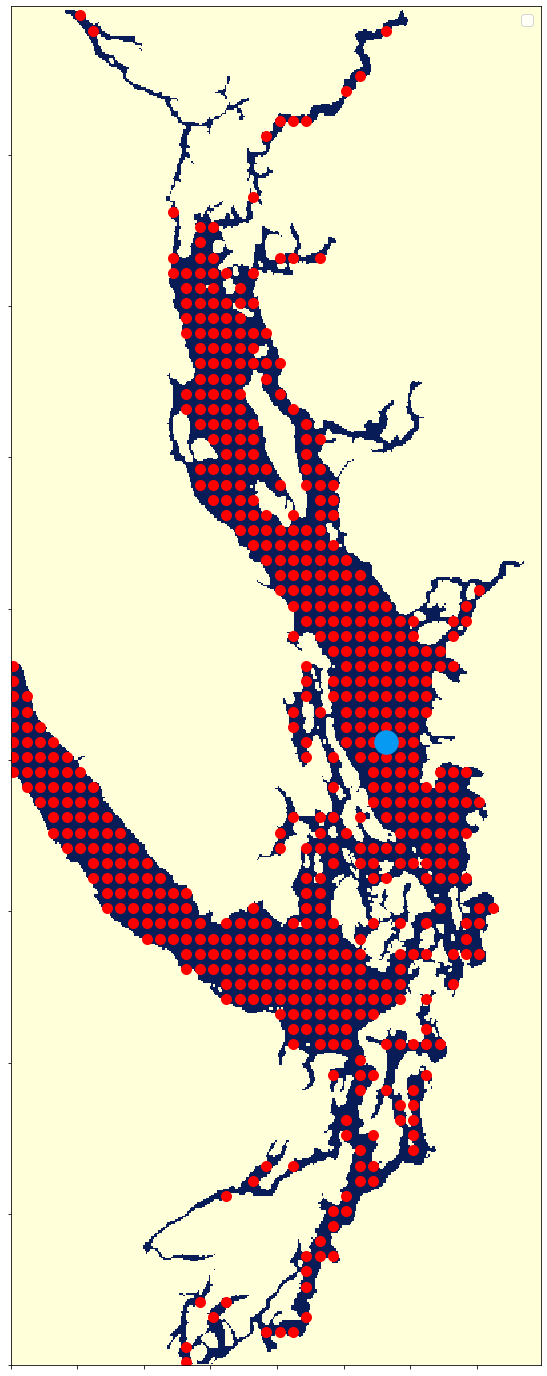

In [5]:
path = '/ocean/tjarniko/MEOPAR/at3/notebooks/CLUSTER/verze2pt0/hind_clfxn/maps_signals/'
var = 'ved'
year = '2016'
fs = path + var + '_' + year + 'hind_cl.mat'
mat_contents = sio.loadmat(fs)
mat_contents = sio.loadmat(fs)
cl = np.squeeze((mat_contents['clustermap']))
no_clusters = max(cl)
tit = ''

markersize = 100
titfontsize = 25
legfontsize = 15
fsx = 15
fsy = 25
fname = './figs/' + var + year + 'map.jpg'

map_clusters(tit,no_clusters,cl,fsx,fsy,markersize,titfontsize,legfontsize,fname,'red',463)



366


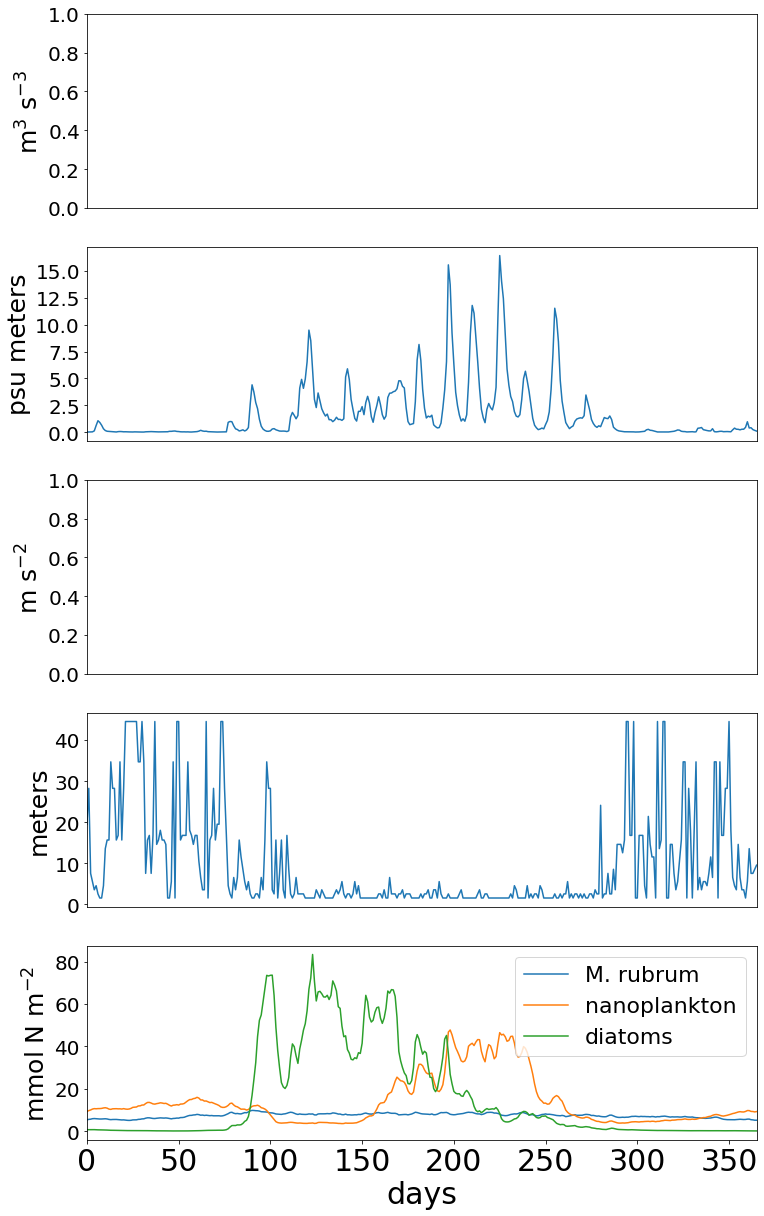

In [12]:
stnno = '433'
tdir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/NC_HINDCAST/2016/'
#pnw = tdir + 'WIND_TS/stn_'+stnno+'_wind_data_sp10.nc'
pnb = tdir + 'BIO_TS/stn_'+stnno+'_sp10.nc'
#pnv = tdir + 'VED_TS/stn_'+stnno+'avg_ved_sp10.nc'
pnh = tdir + 'HALO_TS/stn_'+stnno+'halo_depth_sp10.nc'

pnf = tdir + 'FWI_TS/stn_'+stnno+'_fwi4m_data_sp10_threshold50.nc'

bio = nc.Dataset(pnb)


halo = nc.Dataset(pnh)
halop = halo.variables['halocline_depth']
fwi = nc.Dataset(pnf)
fwip = fwi.variables['freshwater_index']

# wind = nc.Dataset(pnw)
# windp = wind.variables['wind_energy']
# ved = nc.Dataset(pnv)
# vedp = ved.variables['daily_ved']

MYRI = bio.variables['MYRI'][0:366]
PHY2 = bio.variables['PHY2'][0:366]
PHY = bio.variables['PHY'][0:366]
t = np.arange(366)
print(t.size)

fig = plt.figure(figsize=(12,25))

for i in range(1,6):
    ax = fig.add_subplot(6,1,i)
    if i == 1:
        #plt.plot(t, windp )
        plt.xlim([0,365])
        plt.xticks([], [])
        plt.yticks(fontsize = '20')
        plt.ylabel('m$^{3}$ s$^{-3}$',fontsize = '25')
        
    if i == 2:
        plt.plot(t, fwip )
        plt.xlim([0,365])
        plt.xticks([], [])
        #plt.yticks([], [])
        plt.yticks(fontsize = '20')
        plt.ylabel('psu meters',fontsize = '25')

    if i == 3:
        #plt.plot(t, vedp ) 
        plt.xlim([0,365])
        plt.xticks([], [])
        plt.yticks(fontsize = '20')
        plt.ylabel('m s$^{-2}$',fontsize = '25')
        
    if i == 4:
        plt.plot(t, halop )
        plt.xlim([0,365])
        plt.xticks([], [])
        plt.yticks(fontsize = '20')
        plt.ylabel('meters',fontsize = '25')
    if i == 5:
        plt.plot(t, MYRI/218509, label="M. rubrum" )
        plt.plot(t, PHY2/218509, label="nanoplankton" )
        plt.plot(t, PHY/218509, label="diatoms" )
        plt.yticks(fontsize = '20')
        plt.ylabel('mmol N m$^{-2}$',fontsize = '25')
#     #plt.title('Hindcast, productivity, year 2015, stn 417 (x = 262,y = 452)')
        plt.xlim([0,365])
        #plt.yticks([], [])
        plt.yticks(fontsize = '20')
        plt.xlabel('days',fontsize = '30')
        plt.xticks(fontsize = '30')
        plt.legend(fontsize = '22')

# plt.tight_layout()
# plt.savefig('tight.png')
# plt.show()

x is
292
y is
452


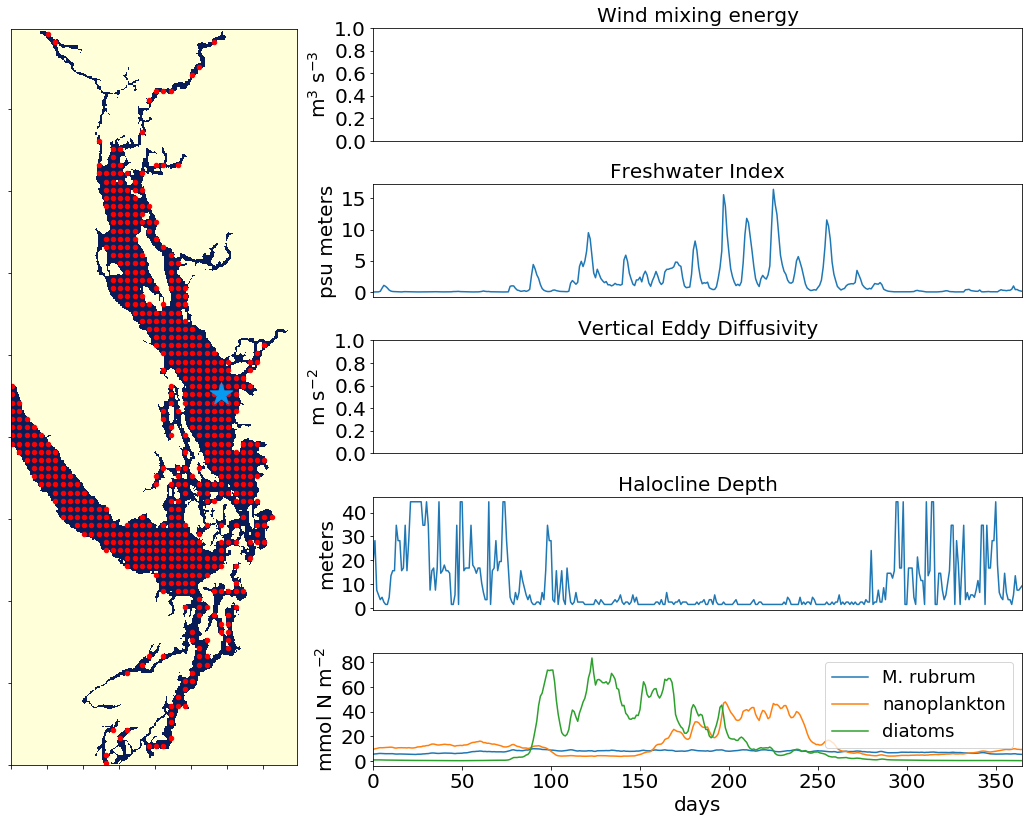

In [46]:
fs = 20
fig = plt.figure(figsize=(18*fact,14.4*fact))

ax = plt.subplot2grid((5,3), (0,0), colspan=1, rowspan=5) 
bath = '/data/tjarniko/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:])

spacing = 10
stn_x, stn_y = mf.make_stns(spacing)
d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)
no_stns = len(d_stn_x)

plt.rcParams['image.cmap'] = 'YlGnBu'

viz_tools.set_aspect(ax)   
fmask = (grid.fmask[0,0,:,:])    
mesh = ax.pcolormesh(fmask, vmin=0, vmax=1)
ax.set_ylim([0,898])
ax.set_xlim([0,398])

ax.scatter(d_stn_x,d_stn_y,s=20,c='red',marker='o')
ax.scatter(d_stn_x[STN1],d_stn_y[STN1],s=550,c='xkcd:azure',marker='*')
print('x is'); print(d_stn_x[STN1]); print('y is'); print(d_stn_y[STN1])

ax.set_xticklabels( () ) 
ax.set_yticklabels( () ) 


ax = plt.subplot2grid((5,3), (0,1), colspan=2, rowspan=1) 
#plt.plot(t, windp )
plt.xlim([0,365])
plt.xticks([], [])
plt.yticks(fontsize = fs)
plt.ylabel('m$^{3}$ s$^{-3}$',fontsize = fs)
plt.title('Wind mixing energy',fontsize = fs)

ax = plt.subplot2grid((5,3), (1,1), colspan=2, rowspan=1) 
plt.plot(t, fwip )
plt.xlim([0,365])
plt.xticks([], [])
#plt.yticks([], [])
plt.yticks(fontsize = fs)
plt.ylabel('psu meters',fontsize = fs)
plt.title('Freshwater Index',fontsize = fs)

ax = plt.subplot2grid((5,3), (2,1), colspan=2, rowspan=1) 
#plt.plot(t, vedp ) 
plt.xlim([0,365])
plt.xticks([], [])
plt.yticks(fontsize = fs)
plt.ylabel('m s$^{-2}$',fontsize = fs)
plt.title('Vertical Eddy Diffusivity',fontsize = fs)

ax = plt.subplot2grid((5,3), (3,1), colspan=2, rowspan=1) 
plt.plot(t, halop )
plt.xlim([0,365])
plt.xticks([], [])
plt.yticks(fontsize = fs)
plt.ylabel('meters',fontsize = fs)
plt.title('Halocline Depth',fontsize = fs)

ax = plt.subplot2grid((5,3), (4,1), colspan=2, rowspan=1) 
plt.plot(t, MYRI/218509, label="M. rubrum" )
plt.plot(t, PHY2/218509, label="nanoplankton" )
plt.plot(t, PHY/218509, label="diatoms" )
plt.yticks(fontsize = fs)
plt.ylabel('mmol N m$^{-2}$',fontsize = fs)
#     #plt.title('Hindcast, productivity, year 2015, stn 417 (x = 262,y = 452)')
plt.xlim([0,365])
#plt.yticks([], [])
plt.yticks(fontsize = fs)
plt.xlabel('days',fontsize = '20')
plt.xticks(fontsize = '20')
plt.legend(fontsize = '18')


plt.tight_layout()


plt.savefig('./paper_figs/MF03.png')
